# Minimal squares method for function approximation

In [5]:
import numpy as np

## Loading table values from file

In [6]:
fname = 'TableFunction.txt'
table = np.loadtxt(fname, dtype=float)
x = table[:, 0]
y = table[:, 1]

In [7]:
N = len(x)

## Defining dimension of approximation polynom

In [8]:
n = int(input('Enter polynom size n: '))

Enter polynom size n: 5


## Defining system of functions phi_k(x)

In [9]:
def phi(x, k):
    return np.power(x, k)

## Calculating coefficients of matrix 

In [10]:
a = np.zeros((n, n))
for k in range(n):
    for j in range(n):
        a[k, j] = phi(x, k) @ phi(x, j)

In [11]:
b = np.zeros((n,))
for i in range(n):
    b[i] = phi(x, i) @ y

## Solving system of linear equations

In [12]:
c = b @ np.linalg.inv(a)

## Defining approximation function

In [13]:
def f(x):
    f = 0
    for i in range(n):
        f += c[i] * phi(x, i)
    return f

In [14]:
f(0.5)

2.2607812499996363

## Calculating average error

In [15]:
eps = 0
for i in range(N):
    eps += (y[i] - f(x[i]))**2
eps = np.sqrt(eps)/N

In [16]:
print('Average error: ', eps)

Average error:  5.506392866084229e-12


## Visualising results

In [17]:
import matplotlib.pyplot as plt

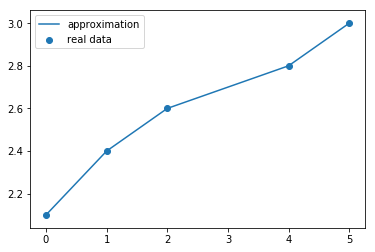

In [18]:
plt.scatter(x, y, label='real data')
plt.plot(x, f(x), label='approximation')
plt.legend()
plt.show()